In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Fixed-point iteration

### <u><span style="font-family:monospace;">Solution</span></u>

In [ ]:
def fixed_point(g, x0, niters=1000, tol=1e-6):
    """
    Fixed-point iteration method
    """
    xold = x0
    for iter in range(niters):
        xnew = g(xold)
        if abs(xnew - xold) < tol:
            print(f"Solution converges at iteration step {iter+1}")
            return xnew
        
        xold = xnew 
    
    print(f"Warning: Method did not converge within the maxinum number of iterations")

In [4]:
def g(x):
    return 0.5 * (x + 5 / x)

sqrt_of_five = fixed_point(g, 2.0)
print(f"sqrt(5)            = {sqrt_of_five}")
print(f"sqrt(5) using math = {math.sqrt(5)}")

Solution converges at iteration step 4
sqrt(5)            = 2.23606797749979
sqrt(5) using math = 2.23606797749979


### <u><span style="font-family:monospace;">Questions to challenge</span></u>
1. Some students may try ChatGPT to solve the problem. If they use "list comprehension" such as 
    ```python 
    x = [i for i in range(10)]
    ```
    In such case, ask them to obtain the roots of the equation without using `for` loop, but using the "list comprehension". The solution is simple:
    ```python
    roots = [fixed_point(g, x0) for x0 in x0_list]
    ```
    If they cannot answer, ask them to do something simpler such as "create the list `l = [0, 3, 6, 9, 12]` using list comprehension syntax".
2. Can you change the code to return both the solution and the iteration step when the solution converges?
3. If I delete the line `return None`, will the code still run properly?
4. How can I find $\sqrt{N}$, where $N$ is a given number, such as $N = 20$, by using the fixed-point method?

## Newton-Raphson method

### <u><span style="font-family:monospace;">Solution</span></u>

In [5]:
def f(x):
    return math.exp(-0.1 * x) * math.sin(2 * x)

def df(x):
    exp_term = math.exp(-0.1 * x)
    trig_term = (2 * math.cos(2 * x)) - (0.1 * math.sin(2 * x))
    return exp_term * trig_term

In [6]:
def newton_raphson(func, dfunc, x0, niters=100, tol=1e-6):
    xold = x0
    for iter in range(niters):

        fval = func(xold)
        dfval = dfunc(xold)
        if abs(dfval) < 1e-15:
            print(f"Divergence: Derivative is zero at x = {xold} at iteration {iter}")
        xnew = xold - fval / dfval

        if abs(xnew - xold) < tol:
            print(f"Solution converges at step {iter + 1}")
            return xnew
        
        xold = xnew

    print(f"Divergence: Root not found within the defined number of iterations and tolerance")

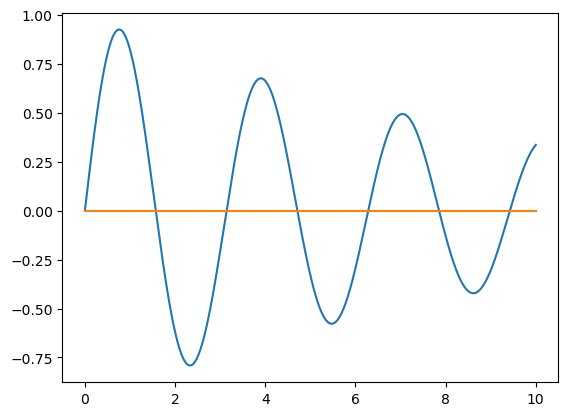

In [7]:
x = np.linspace(0, 10, 1000)
h = np.exp(-0.1 * x) * np.sin(2 * x)
plt.plot(x, h, x, np.zeros_like(x))
plt.show()

In [8]:
roots = []
x0_list = [1.5 * i for i in range(0, 7)]
for x0 in x0_list:
    root = newton_raphson(func=f, dfunc=df, x0=x0)
    roots.append(root)

print(roots)

Solution converges at step 1
Solution converges at step 3
Solution converges at step 3
Solution converges at step 4
Solution converges at step 4
Solution converges at step 4
Solution converges at step 5
[0.0, 1.5707963267948966, 3.1415926535897816, 4.71238898038469, 6.283185307179586, 7.853981633974483, 9.42477796076938]


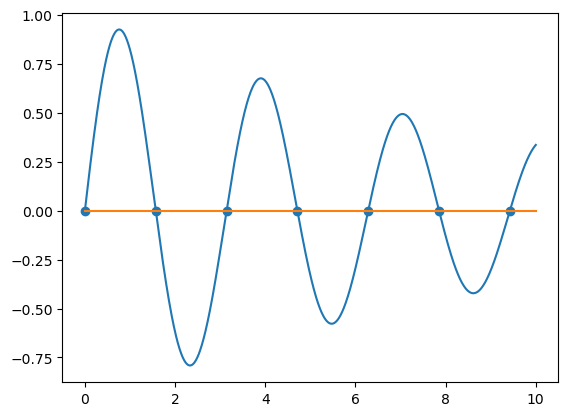

In [9]:
x = np.linspace(0, 10, 1000)
h = np.exp(-0.1 * x) * np.sin(2 * x)
plt.plot(x, h, x, np.zeros_like(x))
plt.scatter(roots, [0 for i in range(len(roots))])

### <u><span style="font-family:monospace;">Questions to challenge</span></u>

1. Some students may try ChatGPT to solve the problem. If they use "list comprehension" such as 
    ```python 
    x = [i for i in range(10)]
    ```
    In such case, ask them to obtain the roots of the equation without using `for` loop, but using the "list comprehension". The solution is simple:
    ```python
    roots = [newton_raphson(f, df, x0=x0) for x0 in x0_list]
    ```
    If they cannot answer, ask them to do something simpler such as "create the list 
    ```python
    l = [0, 3, 6, 9, 12]
    ```
    using list comprehension syntax".

2. Now that you have found all the roots of the equation $$f(x):=\exp(-\frac{1}{10}x) \sin(2 x) = 0$$ in the domain $[0, 10]$. Can you use the function you defined to obtain any root of this equation larger than $10$. Any root is fine.

3. Can you change your code to look for all the roots of the following equation by using the Newton-Raphson method?
    $$
    x^3 - 3 x^2 + 2x = 0
    $$
    You can tell the students in advance that the roots are $x = 0$, $x = 1$ and $x = 2$. They only need to focus on the coding and the logic.

4. Instead of the condition $|x_\text{new} - x_\text{old}| < \varepsilon$ for the convegence test, can we use another test using the function $f(x)$ directly? How do you change the code for that?

In [13]:
xsol = newton_raphson(func=f, dfunc=df, x0=1.5 * 8)
print(xsol)

Solution converges at step 5
12.566370614359164


In [11]:
import sympy as sp

x = sp.symbols('x')
F = sp.expand((x - 1) * (x - 2) * x)
dF = sp.diff(F)
print(f"F = {F}")
print(f"dF = {dF}")

F = x**3 - 3*x**2 + 2*x
dF = 3*x**2 - 6*x + 2


In [12]:
f1 = lambda x: x**3 - 3*x**2 + 2*x
df1 = lambda x: 3*x**2 - 6*x + 2

init_values = [-0.1, 0.5, 1.5]
roots = [newton_raphson(func=f1, dfunc=df1, x0=x0) for x0 in init_values]
print(roots)

Solution converges at step 4
Solution converges at step 2
Solution converges at step 2
[-7.330554633058447e-15, 2.0, 0.0]
